In [ ]:
%%capture
!pip install mordred
!pip install rdkit-pypi

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors

import pandas as pd

In [ ]:
df = pd.read_excel('alcohols.xlsx')

In [ ]:
df.head()

,Name,Smiles
0,2-phenoxyethanol,OCCOC1=CC=CC=C1
1,2-bromoethanol,BrCCO
2,2-fluoroethanol,FCCO
3,methanol,CO
4,benzylalcohol,OCC1=CC=CC=C1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    100 non-null    object
 1   Smiles  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [ ]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['Mol']))], axis=1)


In [ ]:
df.head()

,Name,Smiles,Mol
0,2-phenoxyethanol,OCCOC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b85c8408b30>
1,2-bromoethanol,BrCCO,<rdkit.Chem.rdchem.Mol object at 0x7b85c8408c80>
2,2-fluoroethanol,FCCO,<rdkit.Chem.rdchem.Mol object at 0x7b85c8408c10>
3,methanol,CO,<rdkit.Chem.rdchem.Mol object at 0x7b85c8408cf0>
4,benzylalcohol,OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b85c840a340>


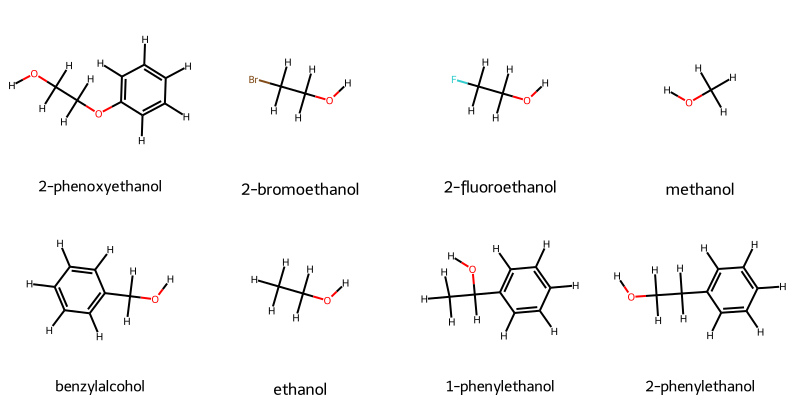

In [ ]:
Draw.MolsToGridImage(df['Mol'][:8],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Name'][:8]])


**Create calculator object to calculate descriptors**

In [ ]:
# Creating a descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

In [ ]:
calc

In [ ]:
# calc.descriptors contains all the descriptor classes
print(calc.descriptors[:5])

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'))


In [ ]:
# print the names of descriptors
all_descriptor_names = [desc.__class__.__name__ for desc in calc.descriptors]
print(all_descriptor_names[:20])

['ABCIndex', 'ABCGGIndex', 'AcidicGroupCount', 'BasicGroupCount', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AromaticAtomsCount', 'AromaticBondsCount', 'AtomCount', 'AtomCount']


In [ ]:
# Checking the length of descriptors in the calculator
len(all_descriptor_names)

1613

**Calculate one descriptor for a sinlge molecule**

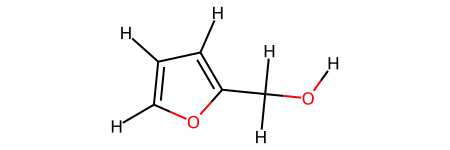

In [ ]:
# Calculating descriptors for a single molecule
ac = mordred.Autocorrelation.ATS(2, 'Z')

ac(df['Mol'][50])
display(df['Mol'][50])

In [ ]:
abc = mordred.ABCIndex.ABCIndex()
abc(df['Mol'][0])

7.071067811865477

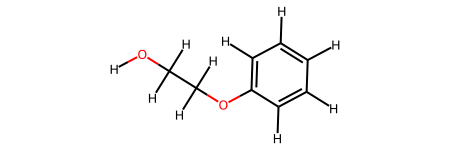

In [ ]:
df['Mol'][0]

**Create one descriptor for large number of molecules**

In [ ]:
# create an empty list
d = []

# create an object of the class of the descriptor you are interested in
desc = mordred.MoeType.SlogP_VSA(k=1)

# loop thorough each molecule
for mol in df['Mol']:
  # call the instance of the class with molecular object as an arguement and append to the empty list
  d.append(desc(mol))

# convert list to the dataframe along with the name of the descriptor as column name and concatenate to the orginal dataset containing SMILES
final_df = pd.concat([df['Smiles'], pd.DataFrame(d, columns=(['logp']))], axis=1)

In [ ]:
final_df.head()

,Smiles,logp
0,OCCOC1=CC=CC=C1,4.736863
1,BrCCO,0.000000
2,FCCO,0.000000
3,CO,0.000000
4,OCC1=CC=CC=C1,0.000000


**Create two or more descriptor for large number of molecules**

In [ ]:
# create an empty list
d = []


# create objects of the classes of the descriptors you are interested in
logp = mordred.MoeType.SlogP_VSA(k=1)
hba =  mordred.HydrogenBond.HBondAcceptor()

# run a for loop
for mol in df['Mol']:
  # create another empty list
  desc = []
  desc.append(logp(mol))
  desc.append(hba(mol))
  d.append(desc)

final_df = pd.concat([df['Smiles'], pd.DataFrame(d, columns=(['logp', 'hba']))], axis=1)

In [ ]:
final_df.head()

,Smiles,logp,hba
0,OCCOC1=CC=CC=C1,4.736863,2
1,BrCCO,0.000000,1
2,FCCO,0.000000,1
3,CO,0.000000,1
4,OCC1=CC=CC=C1,0.000000,1


**Calculate all the descriptors for a dataframe**

In [ ]:
all_desc = calc.pandas(df['Mol'])

100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


In [ ]:
all_desc.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,7.071068,6.54776,0,0,12.932143,2.154341,4.308683,12.932143,1.293214,3.179653,...,8.438366,38.130322,138.068080,6.903404,133,9,42.0,44.0,3.111111,2.50
1,2.121320,2.34010,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,123.952377,13.772486,10,1,10.0,8.0,2.500000,1.25
2,2.121320,2.34010,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,64.032443,7.114716,10,1,10.0,8.0,2.500000,1.25
3,0.000000,0.00000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,1.098612,7.493061,32.026215,5.337702,1,0,2.0,1.0,2.000000,1.00
4,5.656854,5.42766,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,...,8.298291,35.247635,108.057515,6.753595,64,7,34.0,36.0,2.611111,2.00


In [ ]:
df_final = pd.concat([df['Smiles'], all_desc], axis=1)
df_final.head()

,Smiles,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,OCCOC1=CC=CC=C1,7.071068,6.54776,0,0,12.932143,2.154341,4.308683,12.932143,1.293214,...,8.438366,38.130322,138.068080,6.903404,133,9,42.0,44.0,3.111111,2.50
1,BrCCO,2.121320,2.34010,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,...,5.509388,22.328143,123.952377,13.772486,10,1,10.0,8.0,2.500000,1.25
2,FCCO,2.121320,2.34010,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,...,5.509388,22.328143,64.032443,7.114716,10,1,10.0,8.0,2.500000,1.25
3,CO,0.000000,0.00000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.098612,7.493061,32.026215,5.337702,1,0,2.0,1.0,2.000000,1.00
4,OCC1=CC=CC=C1,5.656854,5.42766,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,...,8.298291,35.247635,108.057515,6.753595,64,7,34.0,36.0,2.611111,2.00


In [ ]:
df_final.to_excel('final.xlsx', index=None)